# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'data/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)



In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda

msk = np.random.rand(len(df)) < 0.8

X_train = X[msk]
X_test = X[~msk]

y_train = y[msk]
y_test = y[~msk]

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
# En esta celda cargá el regresor y realizá el entrenamiento

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
# Acá realizá la predicción

y_pred = regressor.predict(X_test)
y_pred

array([129000.,  69000., 145000., ..., 120000.,  95000.,  88000.])

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
# En esta celda calculá el rmse

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_dtree = sqrt(mean_squared_error(y_test, y_pred))
print(rmse_dtree)

25098.806511267463


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
depth = np.arange(1, 31, 5)
rmses_train = []
rmses_test = []
for i in depth:
    regressor = DecisionTreeRegressor(max_depth = i, random_state=1)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_train)
    rms = sqrt(mean_squared_error(y_train, y_pred))
    rmses_train.append(rms)
    y_pred = regressor.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, y_pred))
    rmses_test.append(rms)
    

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

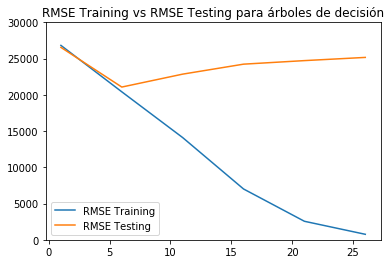

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [9]:
X_train = X_train.iloc[:,5:]
X_test = X_test.iloc[:,5:]

In [10]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 200

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

rmse_knn = sqrt(mean_squared_error(y_test, y_pred))
print(rmse_knn)

29997.08236913727


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [11]:
# Calculá los cambio en el rmse en esta celda

rmses_train = []
rmses_test = []
for i in range(1, 30):
    knn = KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    rms = sqrt(mean_squared_error(y_train, y_pred))
    rmses_train.append(rms)
    y_pred = knn.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, y_pred))
    rmses_test.append(rms)
    

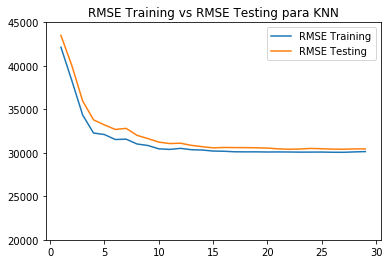

In [12]:
plt.plot(range(1,30), rmses_train, label='RMSE Training')
plt.plot(range(1,30), rmses_test, label='RMSE Testing')
plt.ylim((20000, 45000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [13]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [14]:
# Calculá en esta celda los cross_val_score

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [15]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [16]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [17]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,154000.000,142583.333,11416.667
1,95900.000,131884.634,35984.634
2,83500.000,131884.634,48384.634
3,165000.000,131884.634,33115.366
4,110000.000,131992.656,21992.656
5,120000.000,131884.634,11884.634
6,89000.000,131884.634,42884.634
7,79000.000,131884.634,52884.634
8,125000.000,131992.656,6992.656
9,176999.000,131884.634,45114.366
